In [5]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
root_dir = os.path.abspath('../')
sys.path.append(root_dir)
sys.path.append(os.path.join(root_dir,'../DPMJET-III-gitlab'))
# print root_dir

pythia_dir = os.path.join(
    os.path.expanduser('~'), 'devel', 'apps', 'pythia8240')
sys.path.append(os.path.join(pythia_dir, 'lib'))

from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy.common import impy_config, pdata

In [7]:
# AF: This is what the user interaction has to yield.
# It is the typical expected configuration that one
# wants to run (read pp-mode at energies not exceeding
# 7 TeV). If you want cosmic ray energies, this should
# be rather p-N at 10 EeV and lab frame (not yet defined).

event_kinematics = EventKinematics(
    ecm= 7000 * GeV,
    p1pdg=2212,
    p2pdg=2212
#     nuc2_prop=(12,6)
)

In [8]:
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True

In [9]:
# Define the two models
m1 = 'PHOJET112'
m2 = 'PHOJET171'

In [10]:
gen_m1 = make_generator_instance(interaction_model_by_tag[m1])
gen_m1.init_generator(event_kinematics)
# import IPython
# IPython.embed()
gen_m2 = make_generator_instance(interaction_model_by_tag[m2])
gen_m2.init_generator(event_kinematics)


dpmjet306
dpmjetIII171


In [11]:
n_bins = 30
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])

m1_pions = np.zeros(n_bins)
m1_protons = np.zeros(n_bins)
m1_negpions = np.zeros(n_bins)

eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
widths_eta = (eta_bins[1:] - eta_bins[:-1])

m1_charged_eta = np.zeros(n_bins)

n_events = 10000
norm = 1./float(n_events)

# This
for event in gen_m1.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    m1_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    m1_pions += norm/widths*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    m1_charged_eta += norm/widths_eta*np.histogram(event.eta,bins=eta_bins)[0]
    m1_negpions += norm/widths*np.histogram(np.sqrt(pdata.mass(-211)**2 + event.pt2[(event.p_ids) == -211]),bins=bins)[0]

In [12]:
m2_pions = np.zeros(n_bins)
m2_protons = np.zeros(n_bins)
m2_charged_eta = np.zeros(n_bins)

for event in gen_m2.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    m2_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    m2_pions += norm/widths*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    m2_charged_eta += norm/widths_eta*np.histogram(event.eta,bins=eta_bins)[0]

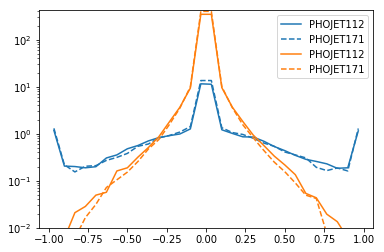

In [13]:
l=plt.plot(grid, m1_protons,label=m1)[0]
plt.plot(grid, m2_protons,c=l.get_color(), ls='--',label=m2)
l=plt.plot(grid, m1_pions,label=m1)[0]
plt.plot(grid, m2_pions,c=l.get_color(), ls='--',label=m2)
plt.ylim(1e-2,)
plt.semilogy()
plt.legend()

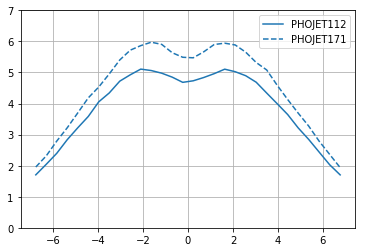

In [14]:
l=plt.plot(eta_grid, m1_charged_eta, label=m1)[0]
plt.plot(eta_grid, m2_charged_eta,c=l.get_color(), ls='--', label=m2)
plt.ylim(0,7)
plt.grid()
plt.legend()

In [15]:
for event in gen_m1.event_generator(event_kinematics, 3):
    event.filter_final_state_charged()
    for pid, x, y, z, e in zip(event.p_ids, event.px, event.py, event.pz, event.en):
        print '{0:8}: {1:10.2e} {2:10.2e} {3:10.2e} {4:10.2e}'.format(pid, x, y, z, e) 

    -321:  -4.84e-02  -5.12e-01   4.49e+02   4.49e+02
     321:   5.47e-01   1.43e-01   2.27e+02   2.27e+02
    -211:  -5.48e-01   1.91e-01   1.41e+02   1.41e+02
    -211:   1.54e-02   2.78e-01   2.92e+01   2.92e+01
     211:  -1.72e-01  -7.44e-01  -1.75e+00   1.91e+00
     211:  -4.63e-01   4.85e-01  -3.24e+00   3.31e+00
    2212:  -1.17e+00   3.66e-01   2.18e+03   2.18e+03
     211:   4.58e-01  -3.17e-01   4.95e+01   4.96e+01
    -211:   1.84e-01   7.60e-02   8.00e-01   8.36e-01
     211:   9.18e-02  -1.28e-01   1.79e+00   1.81e+00
    -211:   1.99e-01  -2.50e-01   4.54e-01   5.73e-01
     211:  -2.23e-01   2.09e-01   1.49e-01   3.68e-01
     211:   9.13e-02  -2.92e-01  -4.48e-01   5.60e-01
     211:   7.33e-02  -4.72e-01  -3.50e-01   6.09e-01
    -211:   8.17e-02  -3.73e-02  -2.04e-01   2.63e-01
    -211:  -4.29e-01   7.74e-01  -3.30e+00   3.42e+00
    -211:  -3.41e-01   2.96e-01  -1.27e+00   1.35e+00
     211:   2.53e-01  -2.95e-01  -1.31e+00   1.37e+00
    -211:  -4.99e-01   4.05e

In [16]:
gen_m2.lib.pomdls.iswmdl[5]

3